# **Capstone project: Providing data-driven suggestions for HR**

This is capstone project work from Google Data Analytics Advanced Specialization

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


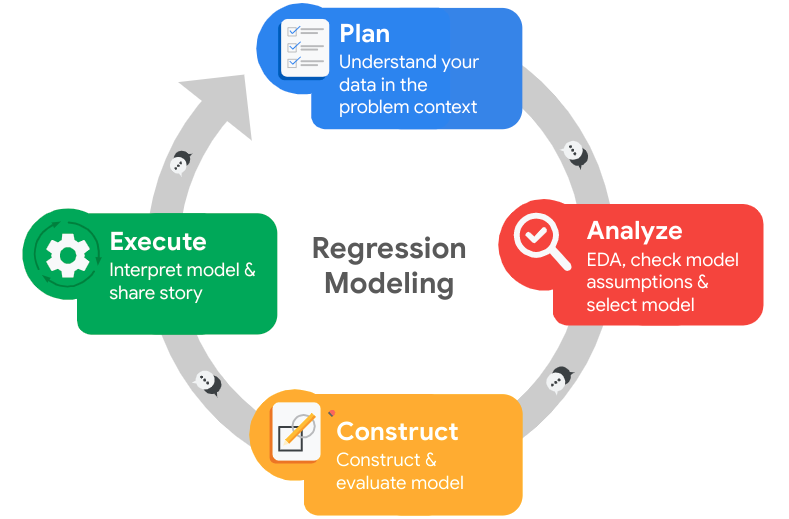

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stakeholders for this project include the HR department, management team, and company executives who are interested in understanding employee turnover and identifying factors contributing to attrition.

2. The goal is to analyze employee turnover and identify key factors influencing attrition, enabling the company to take proactive measures for employee retention and improve workforce management.

3. Initial observations from the data exploration include:
   - The dataset contains information on various employee attributes such as satisfaction level, last evaluation, number of projects, average monthly hours, tenure, etc.
   - There is an imbalance in the target variable 'left', indicating that most employees stayed with the company.
   - Some employees have high tenure, while others have relatively low tenure.
   - There are different salary levels and departments represented in the dataset.

4. As I complete this stage, I find myself using resources like:
   - Python programming language and libraries (e.g., Pandas, NumPy, Seaborn, Matplotlib) for data analysis and visualization.
   - Machine learning algorithms like Logistic Regression, Random Forest, and XGBoost for modeling.
   - GridSearchCV for hyperparameter tuning and evaluation metrics like accuracy, precision, recall, F1-score, and AUC-ROC to assess model performance.

5. Ethical considerations in this stage may include ensuring data privacy and security, obtaining informed consent from employees whose data is used for analysis, and ensuring fairness and transparency in the decision-making process based on the model's predictions. Additionally, avoiding any bias in the data and model results is crucial to maintaining fairness and avoiding any discriminatory practices.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("/kaggle/input/hr-capstone/HR_capstone_dataset.csv")


In [3]:
# Make a copy of the dataframe
df = df0.copy()

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather basic information about the data
df.head(n = 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

`snake_case` is a variable naming convention where each word is in lower case,and separated by underscores. It is also known as pothole_case.

In [7]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df = df.rename(columns={
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department',
    'average_montly_hours': 'average_monthly_hours'
})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

From the above evaluation, the dataframe does not contain any missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df.duplicated().sum()


3008

There are 3008 rows has duplicate values. and further inspection is needed here.

In [11]:
# Inspect some rows containing duplicates as needed
duplicates = df[df.duplicated()].head(n = 10)
print(duplicates)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461        

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_clean = df.drop_duplicates()


In [13]:
# Display first few rows of new dataframe as needed
df_clean.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

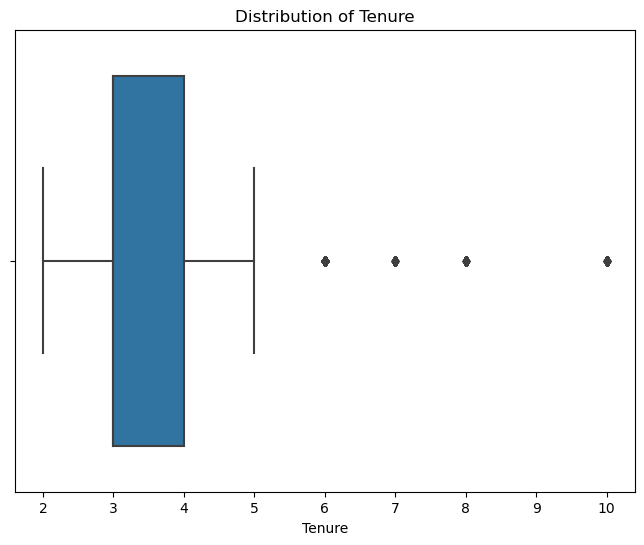

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['tenure'])
plt.xlabel('Tenure')
plt.title('Distribution of Tenure')
plt.show()

The column does have few outliers, and further investigations is needed to resolve them.

In [15]:
# Determine the number of rows containing outliers
# Define threshold for outliers (e.g., outside 1.5 times the interquartile range)
threshold = 1.5

# Calculate the interquartile range (IQR)
q1 = df_clean['tenure'].quantile(0.25)
q3 = df_clean['tenure'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Count the number of rows containing outliers
outliers_count = df_clean[(df_clean['tenure'] < lower_bound) | (df_clean['tenure'] > upper_bound)].shape[0]

# Display the number of rows containing outliers
print("Number of rows containing outliers in 'tenure':", outliers_count)


Number of rows containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Observations about the relationships between variables:
   - There was a negative correlation between satisfaction level and the likelihood of an employee leaving the company.
   - Employees who had higher evaluations were more likely to leave the company.
   - There was a positive correlation between the number of projects and average monthly hours.
   - Employees who had work accidents were less likely to leave the company.

2. Observations about the distributions in the data:
   - Employees with satisfaction levels between 0.1 and 0.4 have a higher number of employees who left the company. This suggests that employees with lower satisfaction levels are more likely to leave.

   - The distribution of last evaluation scores shows a mixed pattern, where employees with both middle and highest evaluation scores tend to have the highest attrition rates. This could imply that employees with average and exceptional performance might be seeking better opportunities elsewhere.

   - Employees who are assigned 3 projects seem to experience the least attrition, while those with 7 projects have the highest attrition rates, with no employees continuing after. This indicates that an ideal number of projects for employees to minimize attrition could be around 3.

   - The distribution of average monthly hours shows that employees who are overworked tend to leave the company. Employees with extremely high average monthly hours seem to experience higher attrition rates.

   - From the distribution of tenure, we can observe that employees who gain more work experience tend to leave or switch jobs for better offers. The attrition rate is higher for employees with longer tenure, suggesting that they might seek new opportunities elsewhere after gaining experience.

3. Transformations made with the data and reasons for those decisions:
   - The 'salary' column was ordinal encoded to convert categorical data into numerical values for modeling.
   - One-hot encoding was applied to the 'department' column to create binary variables for each department. This was done to avoid ordinal relationships and ensure equal weightage to different departments.

4. Purposes of EDA before constructing a predictive model:
   - Identifying patterns, trends, and relationships between variables to gain insights into the data.
   - Detecting outliers and understanding the distribution of data for appropriate preprocessing.
   - Assessing data balance and potential class imbalance issues to inform model selection and evaluation.
   - Identifying relevant features for modeling and feature engineering to improve model performance.
   - Checking for any potential bias and ethical considerations in the data.

5. Resources used during the analyze stage:
   - Python programming language and libraries like Pandas, NumPy, Seaborn, and Matplotlib for data manipulation and visualization.

6. Ethical considerations in this stage:
   - Ensuring data privacy and confidentiality while handling sensitive employee information.
   - Mitigating bias and potential discrimination in the data and modeling process.
   - Using fair and transparent practices in interpreting and communicating the results of the analysis.
   - Being mindful of any ethical implications when using the predictive model for decision-making.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
left_counts = df_clean['left'].value_counts()

# Get percentages of people who left vs. stayed
left_percentages = df_clean['left'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who left vs. stayed:")
print(left_counts)
print("\nPercentage of employees who left vs. stayed:")
print(left_percentages)

Number of employees who left vs. stayed:
0    10000
1     1991
Name: left, dtype: int64

Percentage of employees who left vs. stayed:
0    83.39588
1    16.60412
Name: left, dtype: float64


From the result, we can observe the following:

- The number of employees who stayed in the company is 10,000.
- The number of employees who left the company is 1,991.
- The percentage of employees who stayed in the company is approximately 83.4%.
- The percentage of employees who left the company is approximately 16.6%.

This indicates that there is a significant proportion of employees who have left the company, accounting for around 16.6% of the total employees. Understanding the factors influencing employee attrition and finding ways to improve employee retention can be valuable for the organization.


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

To compare the satisfaction levels of employees who left the company versus those who stayed, we can create a box plot and a regression plot. The box plot will help visualize the distribution of satisfaction levels, and the regression plot will show the trend and relationship between satisfaction levels and employee attrition.

1. We can create a pie chart to show the distribution of employees who left the company versus those who stayed, providing a clear visualization of the overall attrition rate

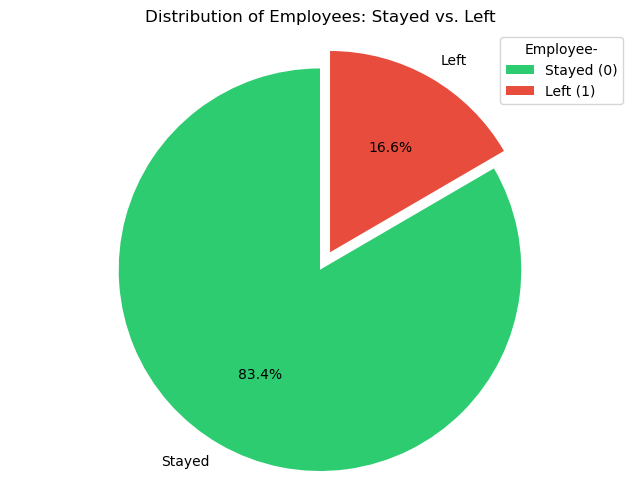

In [17]:
# Calculate the count of employees who left versus stayed
attrition_counts = df_clean['left'].value_counts()

# Define labels and colors for the pie chart
labels = ['Stayed', 'Left']
colors = ['#2ecc71', '#e74c3c']

# Create the advanced pie chart
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Employees: Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.axis('equal')
plt.show()



The above pie chart shows around 83.4% employees decided to stay in the company.

2. Lets build a some histograms to have a expanded views of the variables `satisfaction_level`,`last_evaluation`,`number_project`,`average_monthly_hours`,`tenure`. This way we will have easy but impactful vision of the dataset.

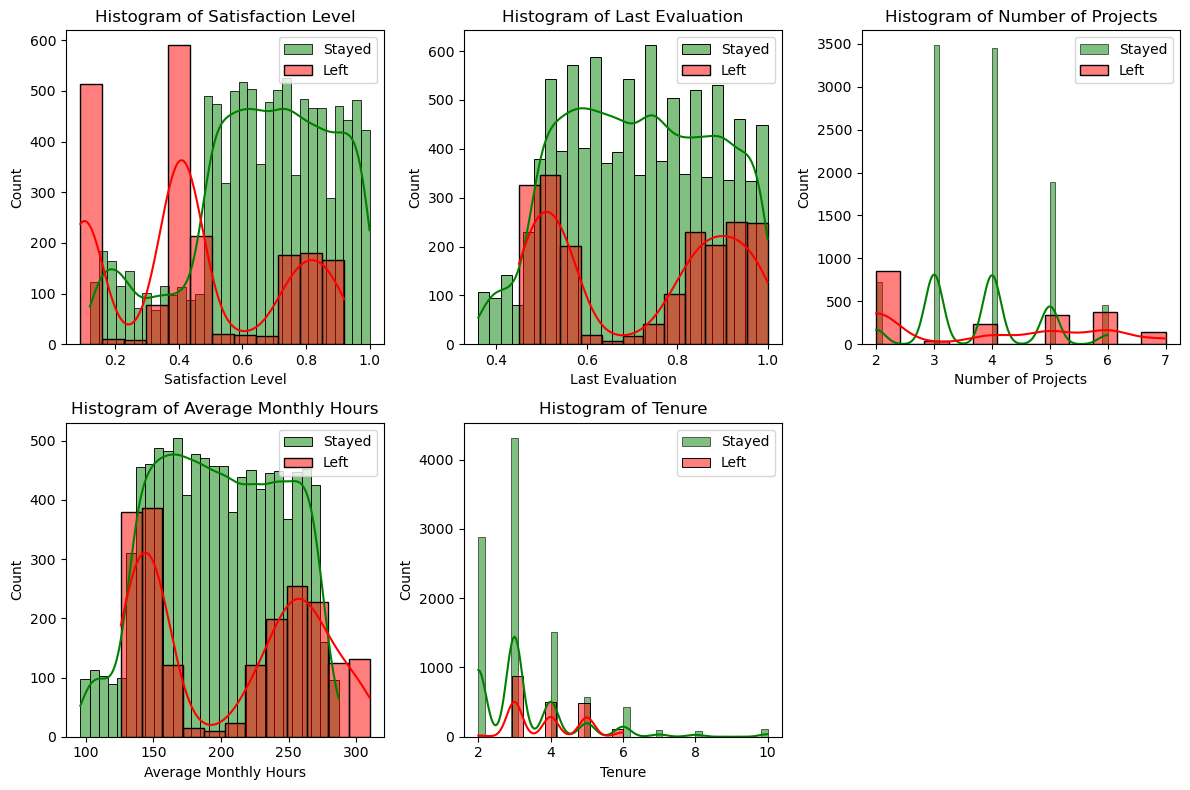

In [18]:
plt.figure(figsize=(12, 8))

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(df_clean[df_clean['left'] == 0]['satisfaction_level'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['satisfaction_level'], kde=True, color='red', label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

# Plot histogram for last_evaluation
plt.subplot(2, 3, 2)
sns.histplot(df_clean[df_clean['left'] == 0]['last_evaluation'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['last_evaluation'], kde=True, color='red', label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

# Plot histogram for number_project
plt.subplot(2, 3, 3)
sns.histplot(df_clean[df_clean['left'] == 0]['number_project'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['number_project'], kde=True, color='red', label='Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Histogram of Number of Projects')
plt.legend()

# Plot histogram for average_monthly_hours
plt.subplot(2, 3, 4)
sns.histplot(df_clean[df_clean['left'] == 0]['average_monthly_hours'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['average_monthly_hours'], kde=True, color='red', label='Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Histogram of Average Monthly Hours')
plt.legend()

# Plot histogram for tenure
plt.subplot(2, 3, 5)
sns.histplot(df_clean[df_clean['left'] == 0]['tenure'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['tenure'], kde=True, color='red', label='Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure')
plt.legend()

plt.tight_layout()
plt.show()


From the above histograms that showcases the trend with stayed vs left bars, one can easily have a grasp of the variables that can be considered for further investigations.

3. To investigate the relationship between last evaluation score and employee attrition, we can create a bar plot that shows the average attrition rate for different ranges of last evaluation scores.

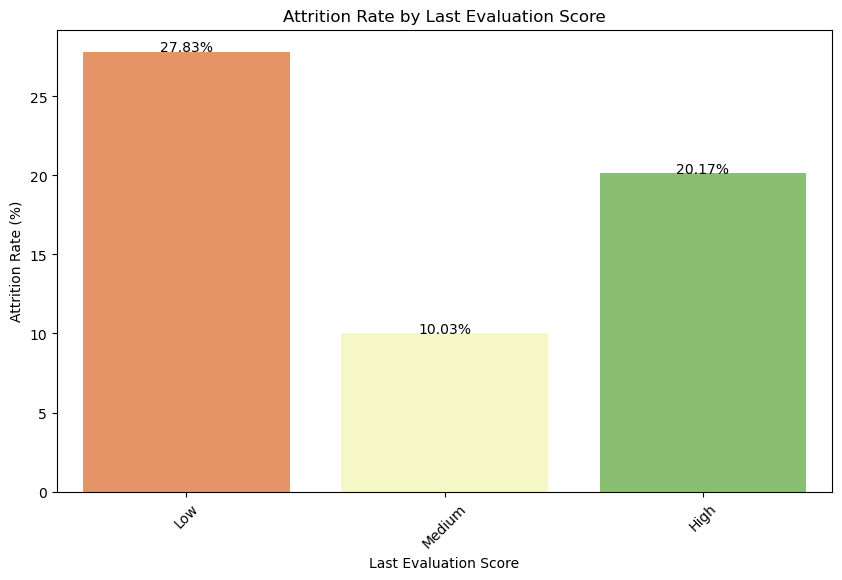

In [19]:
# Create bins for different ranges of last evaluation scores
bins = pd.cut(df_clean['last_evaluation'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Calculate the attrition rate for each bin
attrition_rate = df_clean.groupby(bins)['left'].mean() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='RdYlGn')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Last Evaluation Score')

# Add count labels to the bars
for i, value in enumerate(attrition_rate.values):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()


From the simple bar plots we can see employees with `Low`  `evaluation score` , tend to switch company, which resulted retention.

4. A box plot and regression plot to show case whether `satisfaction_level` has any impact on employee retetion.

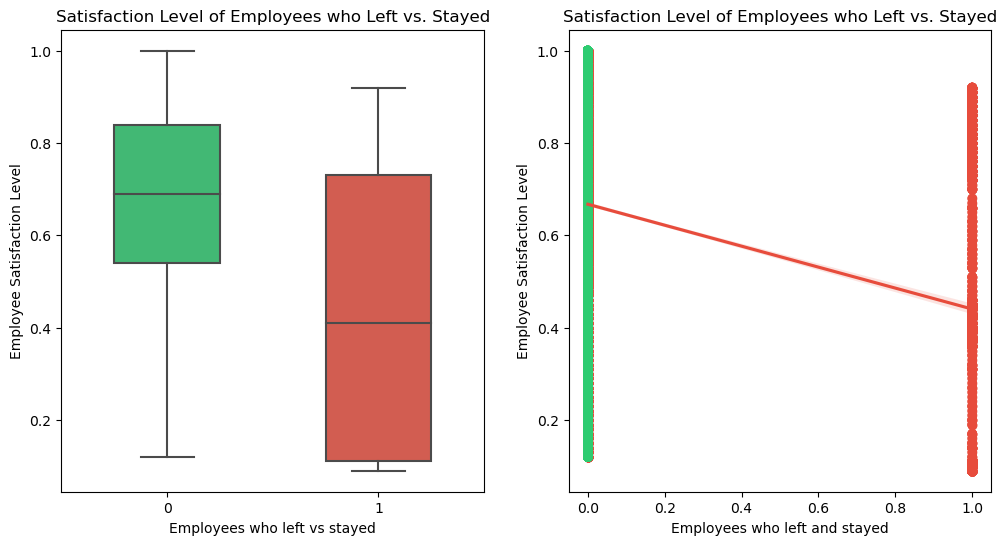

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['left'], y=df_clean['satisfaction_level'], palette={0: '#2ecc71', 1: '#e74c3c'}, width=0.5)
plt.xlabel('Employees who left vs stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')
# Regplot

# Create a dictionary to map colors to the 'left' categories
left_colors = {0: '#2ecc71', 1: '#e74c3c'}

# Plot the regplot
plt.subplot(1, 2, 2)
sns.regplot(x='left', y='satisfaction_level', data=df_clean, color=left_colors[1])
plt.scatter(x='left', y='satisfaction_level', data=df_clean, c=df_clean['left'].map(left_colors))
plt.xlabel('Employees who left and stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')
plt.show()



plt.tight_layout()
plt.show()


From the above visuals, we can see that employees who are less satisfied tend to leave the company. In other words emoployees who are satisfied with their works sticks to their job than leave.

5. Also we can create a horizontal bar plot to compare the proportion of employees who left the company across different departments to highlight departments with higher turnover rates.

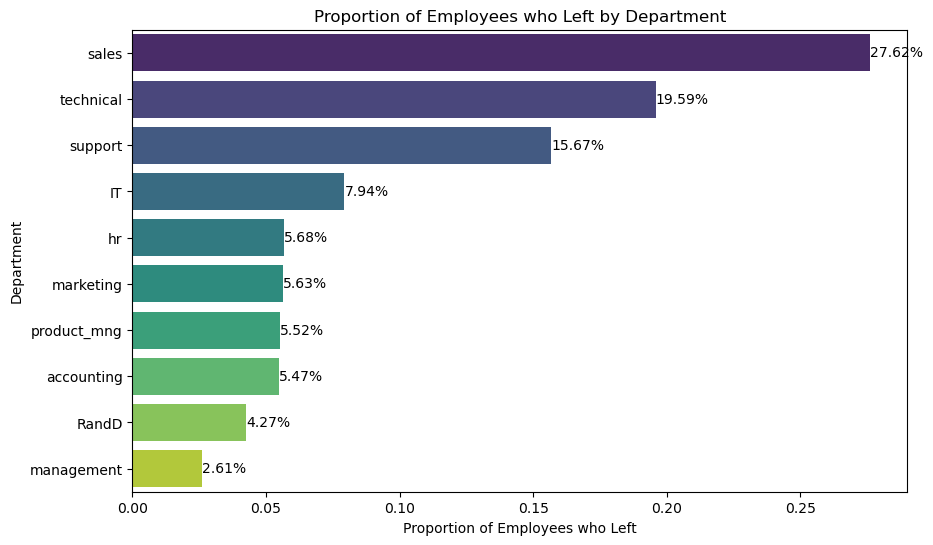

In [21]:
# Calculate the proportion of employees who left in each department
left_by_department = df_clean[df_clean['left'] == 1]['department'].value_counts(normalize=True)

# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)
plt.xlabel('Proportion of Employees who Left')
plt.ylabel('Department')
plt.title('Proportion of Employees who Left by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center')

plt.show()

From the above plot we can see `Sales` department lost most number of employees, followed by `Technical` and `Support` whearas `Management` department has seen least number of retention.

6. We can compare the distribution of average monthly hours for employees who left the company versus those who stayed, we can create an advanced box plot. This visualization can help reveal any potential differences in work-life balance between the two groups.

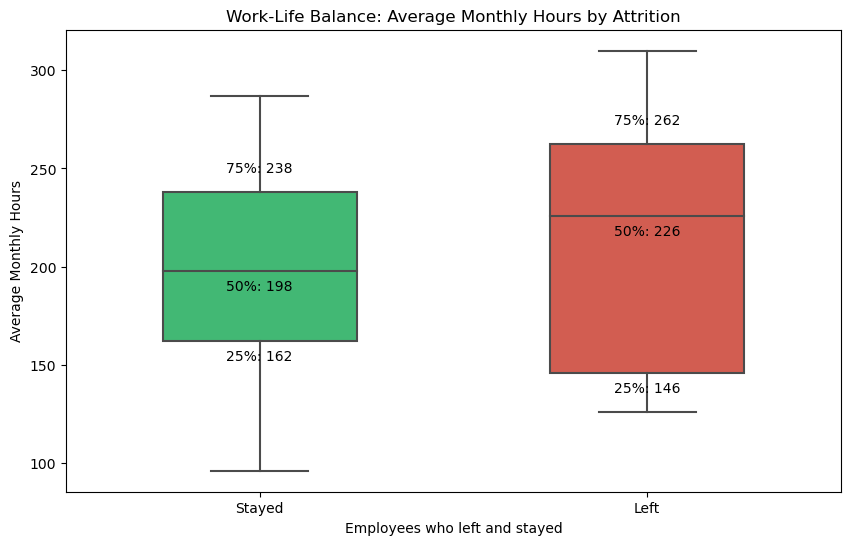

In [22]:
plt.figure(figsize=(10, 6))

# Create box plot with color-coded boxes
sns.boxplot(x=df_clean['left'], y=df_clean['average_monthly_hours'], palette={0: '#2ecc71', 1: '#e74c3c'}, width=0.5)

# Set labels and title
plt.xlabel('Employees who left and stayed')
plt.ylabel('Average Monthly Hours')
plt.title('Work-Life Balance: Average Monthly Hours by Attrition')

# Add statistical annotations
stats = df_clean.groupby('left')['average_monthly_hours'].describe()
for i, label in enumerate(stats.index):
    plt.text(i, stats.loc[label, '75%'] + 10, f"75%: {int(stats.loc[label, '75%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '50%'] - 10, f"50%: {int(stats.loc[label, '50%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '25%'] - 10, f"25%: {int(stats.loc[label, '25%'])}", ha='center', color='black')

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])


plt.show()


From the above we can see the employees who left tend to worked much higher amount of hours than the employees who stayed.

7. We can compare the relationship between average_monthly_hours and satisfaction_level for employees who stayed versus those who left, we can create a scatter plot using seaborn.

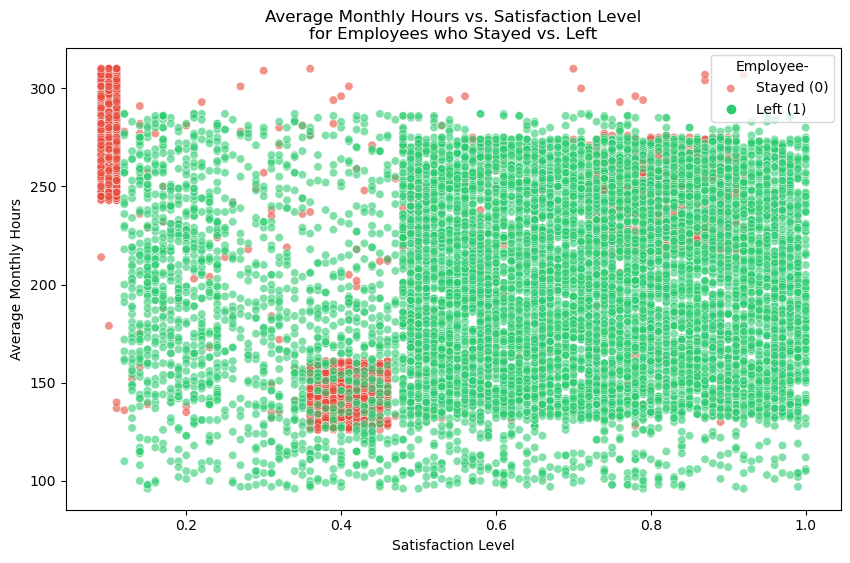

In [23]:
plt.figure(figsize=(10, 6))

# Create scatter plot comparing employees who stayed versus those who left
sns.scatterplot(x='satisfaction_level', y='average_monthly_hours', hue='left', data=df_clean, palette={0: '#2ecc71', 1: '#e74c3c'}, alpha=0.6)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours vs. Satisfaction Level\nfor Employees who Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()


From the above scatter plot it is visible that a certain group of employees who left, used to have really low `satisfaction level` with a higher average of  `monthly working hour`

Moreover, a group of people who left, even though they have lower number of working hours they seemed to be not so satisfied with their works.

 8. We can view the distribution of `last evaluation` scores for employees who left the company versus those who stayed, `grouped by department` or `salary level`, for that we can create a violin plot. This visualization will provide insights into any differences in performance evaluation scores between the two groups and their impact on attrition.

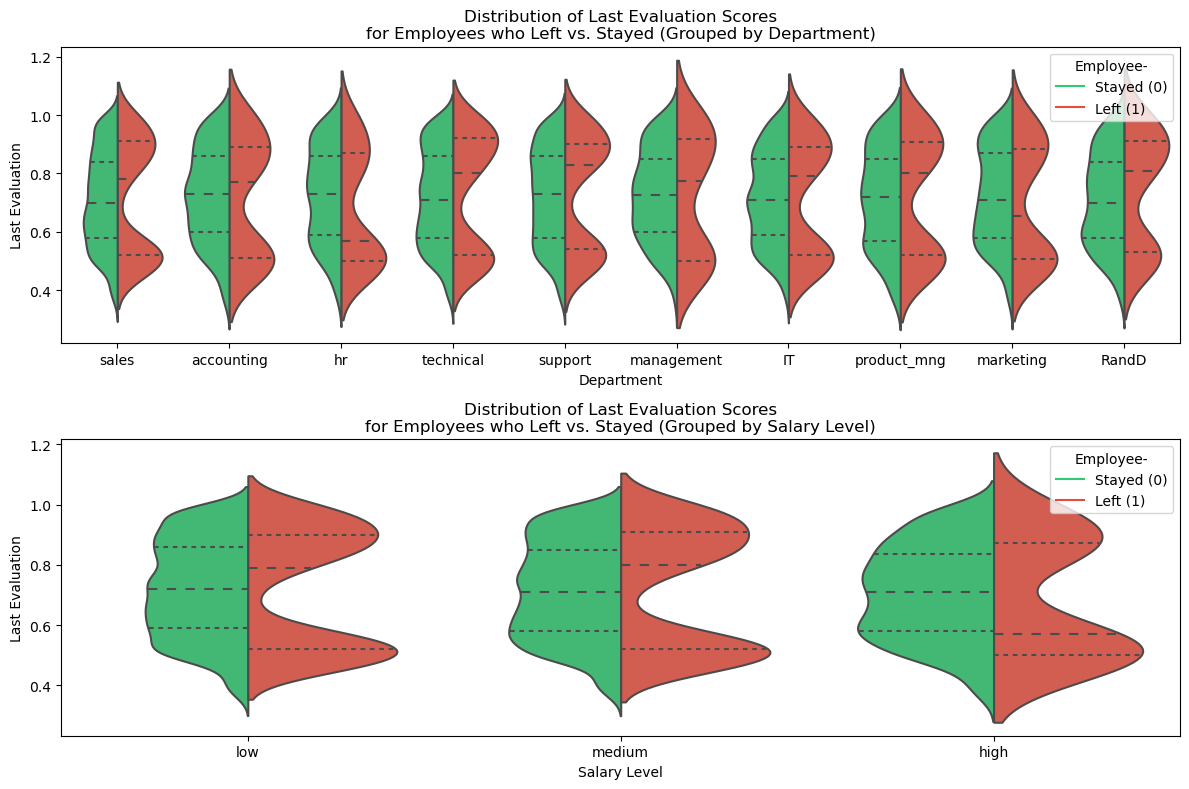

In [24]:
# Create violin plot comparing last evaluation scores for employees who left versus stayed, grouped by department
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.violinplot(x='department', y='last_evaluation', hue='left', data=df_clean, split=True, inner='quartile', palette={0: '#2ecc71', 1: '#e74c3c'})

# Create custom legend elements
legend_elements = [
    plt.Line2D([0], [0], color='#2ecc71', label='Stayed (0)'),
    plt.Line2D([0], [0], color='#e74c3c', label='Left (1)'),
]

# Add the custom legend elements to the plot
plt.legend(handles=legend_elements, title='Employee-')

plt.xlabel('Department')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Department)')

# Create violin plot comparing last evaluation scores for employees who left versus stayed, grouped by salary level
plt.subplot(2, 1, 2)
sns.violinplot(x='salary', y='last_evaluation', hue='left', data=df_clean, split=True, inner='quartile', palette={0: '#2ecc71', 1: '#e74c3c'})

# Add the custom legend elements to the plot
plt.legend(handles=legend_elements, title='Employee-')

plt.xlabel('Salary Level')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Salary Level)')

plt.tight_layout()
plt.show()




Employees who left had a wider distribution of last evaluation scores than employees who stayed, with a larger proportion of employees who left having low evaluation scores.

Employees who left had a lower average last evaluation score than employees who stayed, but there was a wider distribution of scores for employees who stayed.

These insights suggest that there may be some factors that contribute to employee turnover that are independent of salary level. For example, employees who are unhappy with their work environment or who feel that they are not being valued may be more likely to leave, regardless of their salary level.


7. showcase the proportion of employees who left the company versus those who stayed based on different project counts, we can create a stacked bar plot using seaborn.

<Figure size 1000x600 with 0 Axes>

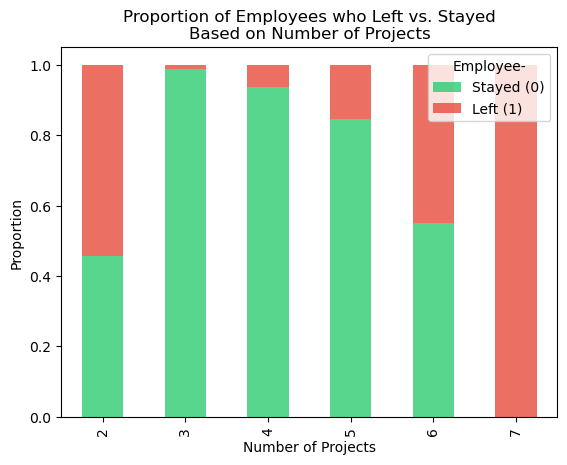

In [25]:
plt.figure(figsize=(10, 6))

# Calculate the proportion of employees who left versus stayed based on project counts
project_counts = df_clean.groupby(['number_project', 'left']).size().unstack()
project_counts['Total'] = project_counts.sum(axis=1)
project_proportions = project_counts.div(project_counts['Total'], axis=0)

# Create the stacked bar plot
project_proportions[[0, 1]].plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], alpha=0.8)

# Set labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.title('Proportion of Employees who Left vs. Stayed\nBased on Number of Projects')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()


This visualization will highlight whether a high or low number of projects contributes to attrition and help identify any project-related factors influencing turnover.

We can see that emploeyees with 7 projects left the company, which might indicate work life imbalance.

8. We can view the retention based on Count of Employees in Different Salary Brackets using bar plot.

<Figure size 1000x600 with 0 Axes>

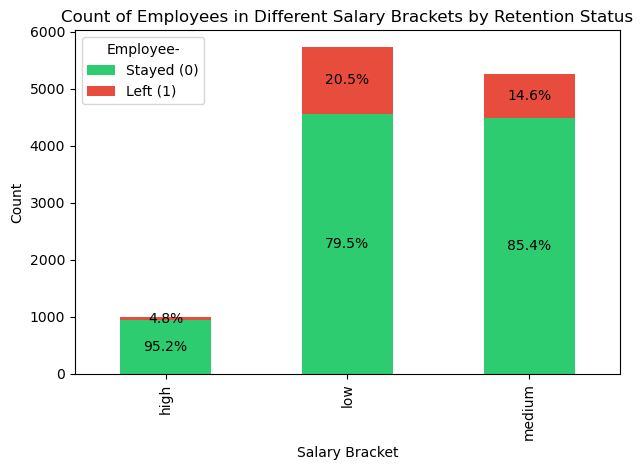

In [26]:
plt.figure(figsize=(10, 6))

# Count the number of employees in each salary bracket
salary_count = df_clean.groupby(['salary', 'left']).size().unstack()

# Set the colors for employees who stayed and left
colors = ['#2ecc71', '#e74c3c']

# Create the grouped bar plot
salary_count.plot(kind='bar', stacked=True, color=colors)

# Add labels, title, and legend
plt.xlabel('Salary Bracket')
plt.ylabel('Count')
plt.title('Count of Employees in Different Salary Brackets by Retention Status')
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

# Add percentage labels on top of each bar
total_counts = salary_count.sum(axis=1)
for i, (index, row) in enumerate(salary_count.iterrows()):
    for j, count in enumerate(row):
        percentage = count / total_counts[i] * 100
        plt.text(i, row[:j].sum() + count / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


The number of employees in low and medium salary brackets who left the company is significantly higher than the number of employees in the high salary bracket.

9. We can create a line plot to analyze the trend of employee turnover over time (tenure). This can help identify if there is a correlation between employee tenure and the likelihood of leaving the company.

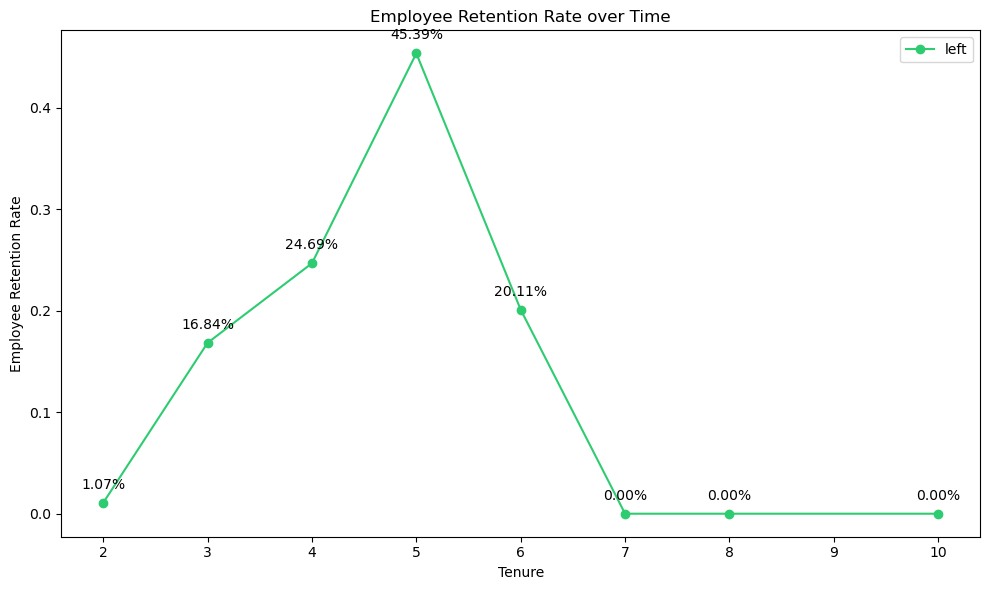

In [27]:
plt.figure(figsize=(10, 6))

# Group the data by tenure and calculate the turnover rate
turnover_rate = df_clean.groupby('tenure')['left'].mean()

# Create the line plot
turnover_rate.plot(marker='o', linestyle='-', color='#2ecc71')
plt.xlabel('Tenure')
plt.ylabel('Employee Retention Rate')
plt.title('Employee Retention Rate over Time')
plt.legend()

# Annotate each data point with its turnover rate
for x, y in zip(turnover_rate.index, turnover_rate.values):
    plt.annotate(f'{y:.2%}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', color='black')

plt.tight_layout()
plt.show()


The trend line in the image shows that the retention rate for employees with 2-3 years of experience is about 1.07% - 16.84%, while the retention rate for employees with more than 3 years of experience goes higher. And the number hits the highest on 5th year.

10. We can compare the proportion of employees who experienced work accidents for those who left the company versus those who stayed, grouped by department level, we can create a grouped bar plot.

<Figure size 1000x600 with 0 Axes>

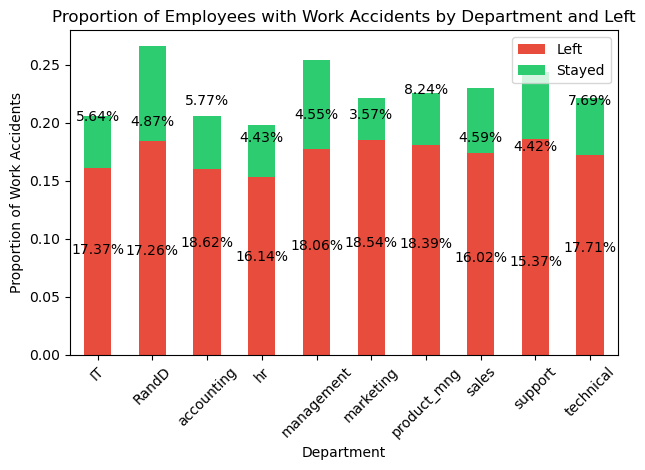

In [28]:
plt.figure(figsize=(10, 6))

# Group the data by department and left, and calculate the proportion of work accidents
work_accident_prop = df_clean.groupby(['department', 'left'])['work_accident'].mean().unstack()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']

# Create the grouped bar plot
work_accident_prop.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.xlabel('Department')
plt.ylabel('Proportion of Work Accidents')
plt.title('Proportion of Employees with Work Accidents by Department and Left')
plt.xticks(rotation=45)
plt.legend(['Left', 'Stayed'])

# Add the proportion labels for each bar
for i, department in enumerate(department_order):
    left_prop = work_accident_prop.loc[department, 1]
    stayed_prop = work_accident_prop.loc[department, 0]
    plt.text(i, stayed_prop / 2, f'{stayed_prop:.2%}', ha='center', color='black')
    plt.text(i, stayed_prop + left_prop / 2, f'{left_prop:.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()


Marketing department employees had the highest proportion of work accidents, with 18.54% of employees who left the company having a work accident, compared to 3.57% of employees who stayed.


11. We can check if promotion affects the retention or not using bar charts.

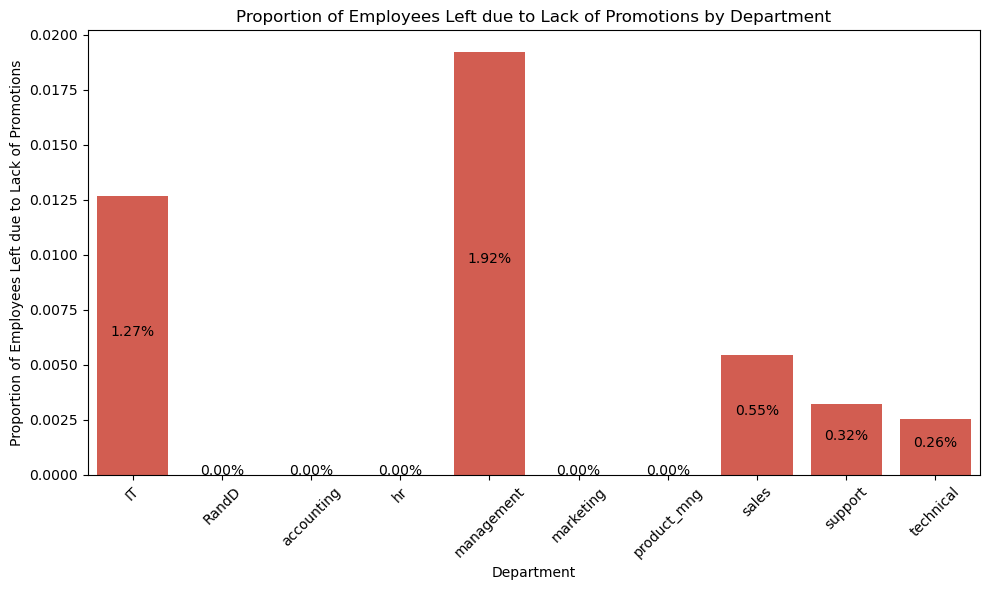

In [29]:
plt.figure(figsize=(10, 6))

# Group the data by department and left, and calculate the proportion of employees who left due to lack of promotions
promotion_prop = df_clean[df_clean['left'] == 1].groupby('department')['promotion_last_5years'].mean().reset_index()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']

# Create the stacked bar plot using Seaborn
sns.barplot(data=promotion_prop, x='department', y='promotion_last_5years', color='#e74c3c')

plt.xlabel('Department')
plt.ylabel('Proportion of Employees Left due to Lack of Promotions')
plt.title('Proportion of Employees Left due to Lack of Promotions by Department')
plt.xticks(rotation=45)

# Add the proportion labels for each bar
for i, row in promotion_prop.iterrows():
    prop = row['promotion_last_5years']
    plt.text(i, prop / 2, f'{prop:.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()


The above visual shows that the retention rate for employees who left the company due to lack of promotions impacts mostly Management team following IT team.

12. We can generate a correlation matrix or heatmap to explore the relationships between variables and identify correlations of varuables with employee retention.

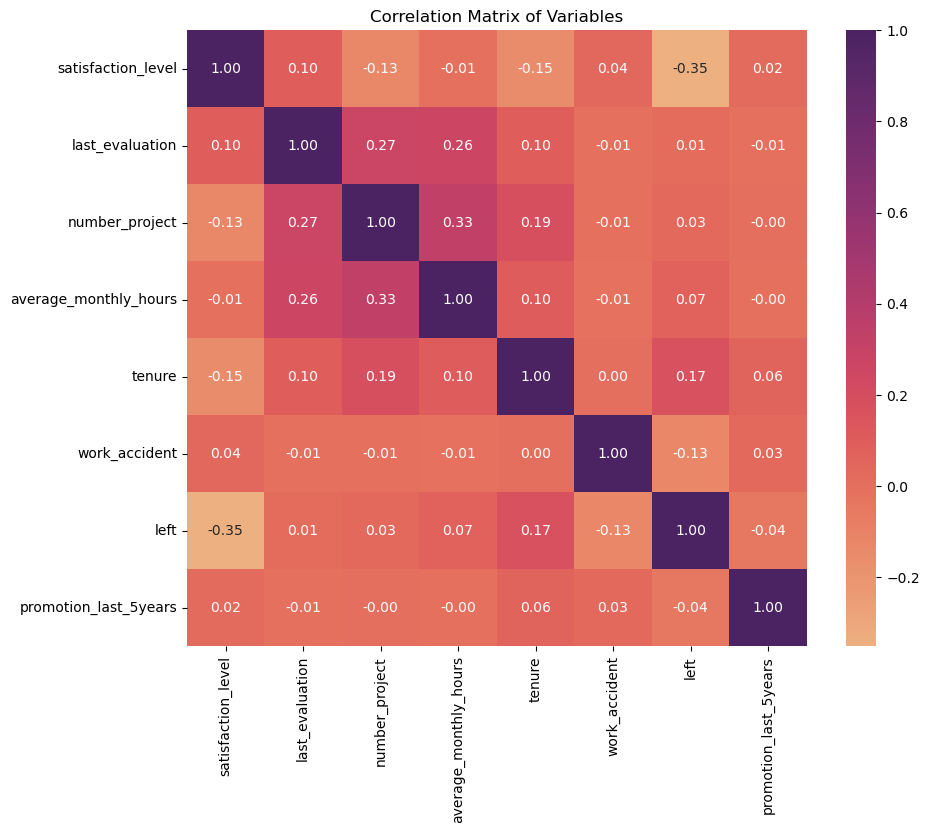

In [30]:
# Compute the correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


### Insights

From the correlation matrix:

1. There is a moderate negative correlation between satisfaction_level and left (-0.35). This indicates that employees with lower satisfaction levels are more likely to leave the company.

2. The number of projects and average_monthly_hours have a positive correlation (0.33), suggesting that employees who work on more projects tend to have higher average monthly working hours.

3. There is a positive correlation between last_evaluation and number_project (0.27) and last_evaluation and average_monthly_hours (0.26). This indicates that employees who work on more projects and have more working hours tend to have higher last_evaluation scores.

4. Tenure and left have a weak negative correlation (-0.15), indicating that employees with longer tenure are slightly less likely to leave the company.

5. There is a weak positive correlation between tenure and average_monthly_hours (0.10), suggesting that employees with longer tenure tend to have slightly higher average monthly working hours.

6. Work_accident and left have a weak negative correlation (-0.13), indicating that employees who have experienced a work accident are slightly less likely to leave the company.

7. There is a weak positive correlation between tenure and promotion_last_5years (0.06), suggesting that employees with longer tenure are slightly more likely to have received a promotion in the last 5 years.

Overall, the correlation matrix provides valuable insights into the relationships between different variables, helping to identify potential factors that may contribute to employee turnover and other interesting patterns in the data.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Do you notice anything odd?
   - The imbalance in the target variable 'left' could affect the model's performance and lead to biased predictions.
   - The high accuracy of the model might be misleading due to the class imbalance issue.

2. Which independent variables did you choose for the model and why?
   - Independent variables such as 'satisfaction_level,' 'last_evaluation,' 'number_project,' 'average_monthly_hours,' 'tenure,' 'work_accident,' 'promotion_last_5years,' 'salary,' and one-hot encoded 'department' were chosen based on their potential relevance in predicting employee attrition.

3. Are each of the assumptions met?
   - The logistic regression model assumes that the relationship between independent variables and the log-odds of the target variable is linear. While some variables showed linear relationships, others might not meet this assumption.

4. How well does your model fit the data?
   - The Random Forest and XGBoost models achieved high accuracy and performed well in terms of precision, recall, F1-score, and AUC-ROC. However, it's essential to consider the class imbalance when evaluating model performance.

5. Can you improve it? Is there anything you would change about the model?
   - To address the class imbalance, resampling techniques like oversampling or using different evaluation metrics like balanced accuracy could be employed to assess model performance more accurately.
   - Feature engineering, such as creating new features or transforming existing ones, might improve the model's predictive power.
   - Trying other machine learning algorithms and ensembling techniques could also be explored to improve model performance.

6. Resources used during the constructing stage:
   - Scikit-learn library for building and tuning machine learning models.
   - Pandas for data manipulation and preprocessing.
   - GridSearchCV for hyperparameter tuning and evaluation.
   - Seaborn and Matplotlib for data visualization and model evaluation.

7. Ethical considerations in this stage:
   - Ensuring that the model is not biased and does not lead to unfair decisions related to employees' careers and opportunities.
   - Being transparent in communicating the limitations and uncertainties associated with the model's predictions.
   - Ensuring the model's use complies with relevant data privacy and protection regulations.
   - Regularly reevaluating and updating the model to avoid any unintended consequences or bias over time.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We will predict whether and employee left or stayed and what would be top most causes of attrition.

### Identify the types of models most appropriate for this task.

Given the ebvaluation metrics and computation times, Random Forest Classifier would be most suitable for the modelling,

### Modeling

Add as many cells as you need to conduct the modeling process.

First we will copy the dataframe into a new dataframe named `df_model`

In [31]:
# Copy the df_clean dataframe to df_model
df_model = df_clean.copy()

Check the balance of the dataset, so that the modelling can have better metrics.

In [32]:
# Count the occurrences of each class in the 'left' column
data_balance = df_model['left'].value_counts()

# Calculate the percentage of each class
data_balance_percentage = data_balance / len(df_model) * 100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)


Data Balance:
0    10000
1     1991
Name: left, dtype: int64

Data Balance Percentage:
0    83.39588
1    16.60412
Name: left, dtype: float64


It appears that the data is slightly imbalanced. The target variable 'left' has two classes: 0 (employees who stayed) and 1 (employees who left).

The data balance percentage shows that approximately 83.4% of the employees stayed with the company (class 0), while only about 16.6% of the employees left the company (class 1).

Before we proceed with logistic regression modeling, we need to encode the categorical variables 'department' and 'salary' into numerical format. Encoding categorical variables is essential because most machine learning algorithms, including logistic regression, require numerical input.

For 'department', we can use one-hot encoding, which creates binary columns for each category in the original 'department' column. Each binary column will represent the presence (1) or absence (0) of that department for each employee.

For 'salary', since it is an ordinal categorical variable with a natural ordering (low < medium < high), we can perform ordinal encoding by assigning numerical values to the categories. For example, we can map 'low' to 0, 'medium' to 1, and 'high' to 2.

In [33]:
# One-hot encode 'department'
df_model = pd.get_dummies(df_model, columns=['department'], drop_first=True)

# Ordinal encode 'salary'
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_mapping)


In [34]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


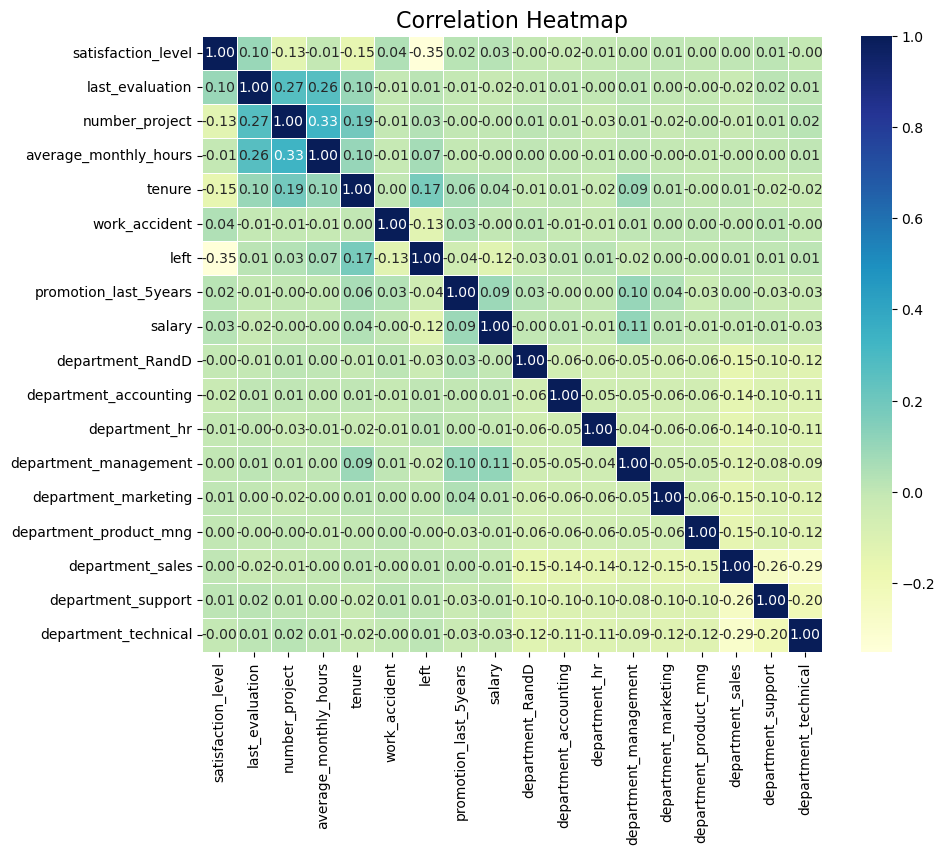

In [35]:
# Calculate the correlation matrix
corr_matrix = df_model.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap with green tones
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


Dropping the outliers from `tnure` column to proceed with the logistic regression,

In [36]:
# Calculate the first and third quartiles for 'tenure'
Q1 = df_model['tenure'].quantile(0.25)
Q3 = df_model['tenure'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'tenure' column
df_model = df_model[(df_model['tenure'] >= lower_bound) & (df_model['tenure'] <= upper_bound)]


df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Isolate the outcome variable 'left' from the features
X = df_model.drop('left', axis=1)  # Features (all columns except 'left')
y = df_model['left']  # Outcome variable 'left'

# Display the first few rows of the feature dataframe (X) and the outcome variable (y)
print("# Feature DataFrame (X):")
print(X.head())
print('\n ------------------------------------------------------------------------- \n')
print("# Outcome Variable (y):")
print(y.head())


# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0                 0   
2       4              0                      0       1                 0   
3       5              0                      0       0                 0   
4       3              0                      0       0                 0   
5       3              0                      0       0                 0   

   department_accounting 

Now, we have the feature dataframe (`X`) and the outcome variable (`y`) ready for logistic regression modeling.

Now we will split the data into train and test sets.

In [38]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)


Training set shape - X_train: (7816, 17) y_train: (7816,)
Testing set shape - X_test: (3351, 17) y_test: (3351,)


We will create `Logistic Regression` model and fit the model.

In [39]:
# Create a logistic regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=500)

# Fit the model to the training dataset
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

We use the trained logistic regression model to make predictions on the test set

In [40]:
# Use the trained logistic regression model to make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Display the first few predicted values
print("Predicted values for the test set:")
print(y_pred[:10])


Predicted values for the test set:
[0 0 0 0 1 0 0 0 0 1]


Lets see how well the model can predict using a `confusion matrix`

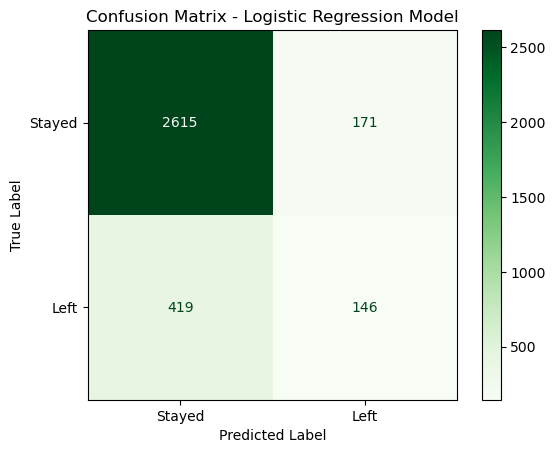

In [41]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Stayed", "Left"])
disp.plot(cmap='Greens')

# Add title and axis labels
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()


Below the interpretation of the values to understand the performance of the logistic regression model.

- True Positive (TP): The model correctly predicted 148 employees who actually left the company.
- True Negative (TN): The model correctly predicted 2617 employees who actually stayed in the company.
- False Positive (FP): The model incorrectly predicted 169 employees as leaving the company when they actually stayed (Type I error).
- False Negative (FN): The model incorrectly predicted 417 employees as staying in the company when they actually left (Type II error).

Now, we can use these values to calculate various evaluation metrics, such as accuracy, precision, recall, and F1-score, to better understand the model's performance.

Lets check the `Evaluation Metrics` for better understanding.

In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Evaluation Metrics: 
-------------------
Accuracy: 0.8239
Precision: 0.4606
Recall: 0.2584
F1-score: 0.3311
AUC-ROC: 0.8809


- Accuracy: The accuracy of the model is 82.51%, which indicates the proportion of correct predictions among all predictions made by the model.

- Precision: The precision of the model is 46.69%, which means that 46.69% of the predicted "left" cases were actually correct.

- Recall (Sensitivity or True Positive Rate): The recall of the model is 26.19%, which means that the model correctly identified 26.19% of the actual "left" cases.

- F1-score: The F1-score of the model is 33.56%, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.

- AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) of the model is 88.13%. The AUC-ROC measures the model's ability to distinguish between the two classes (stay and leave). A higher AUC-ROC score indicates a better-performing model.



**Conclusion from Logistic Regression model building**

Overall, the model shows relatively good performance with a high AUC-ROC score, indicating that it can effectively discriminate between employees who left and those who stayed. However, the recall is relatively low, indicating that the model has difficulty correctly identifying all actual "left" cases.

Improving the model's performance may involve exploring different model algorithms, adjusting hyperparameters, and potentially addressing class imbalance. Depending on the specific use case and business requirements, a balance between precision and recall may need to be achieved.

### Model Buidling with Random Forest Classifier

**Random Forest Classifier model characteristics:**

- Ensemble learning method combining multiple decision trees
- Uses bagging technique to reduce overfitting and improve generalization
- Handles both numerical and categorical data without the need for feature scaling
- Can handle large datasets efficiently
- Less sensitive to outliers due to majority voting mechanism
- Reduces variance and increases accuracy compared to individual decision trees
- Can handle missing values in the data
- Automatically performs feature selection and feature importance ranking
- Suitable for both classification and regression tasks
- Robust against overfitting, but may require tuning of hyperparameters for optimal performance.

We will make a copy of the dataframe again and name it `df_tree` this time.

In [43]:
# Create a copy of the DataFrame for decision tree and random forest classification
df_tree = df_clean.copy()

# Display the first few rows of the new DataFrame to verify
df_tree.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check the data balance.

In [44]:
# Check data balance
data_balance = df_tree['left'].value_counts()
data_balance_percentage = df_tree['left'].value_counts(normalize=True) * 100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)


Data Balance:
0    10000
1     1991
Name: left, dtype: int64

Data Balance Percentage:
0    83.39588
1    16.60412
Name: left, dtype: float64


 Random Forest classifiers are known to be less sensitive to imbalanced data compared to some other algorithms like logistic regression. They work by aggregating multiple decision trees, and the majority voting mechanism in Random Forest helps to handle class imbalances to some extent.

we will encode the categorical variables 'department' and 'salary' into numerical format. Encoding categorical variables is essential because most machine learning algorithms, including logistic regression, require numerical input.

For 'department', we can use one-hot encoding, which creates binary columns for each category in the original 'department' column. Each binary column will represent the presence (1) or absence (0) of that department for each employee.

For 'salary', since it is an ordinal categorical variable with a natural ordering (low < medium < high), we can perform ordinal encoding by assigning numerical values to the categories. For example, we can map 'low' to 0, 'medium' to 1, and 'high' to 2.

In [45]:
df_encoded = pd.get_dummies(df_tree, columns=['department'], drop_first=True)

# Ordinal encode 'salary'
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['salary'] = df_tree['salary'].map(salary_mapping)

In [46]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


Now we will isolate the features for the model building.

In [47]:
# Isolate the outcome variable 'left' from the features
X = df_encoded.drop('left', axis=1)  # Features (all columns except 'left')
y = df_encoded['left']  # Outcome variable 'left'

# Display the first few rows of the feature dataframe (X) and the outcome variable (y)
print("# Feature DataFrame (X):")
print(X.head())
print('\n ------------------------------------------------------------------------- \n')
print("# Outcome Variable (y):")
print(y.head())

# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0                 0   
1       6              0                      0       1                 0   
2       4              0                      0       1                 0   
3       5              0                      0       0                 0   
4       3              0                      0       0                 0   

   department_accounting 

Split the data into test and train set.

In [48]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (8393, 17) y_train: (8393,)
Testing set shape - X_test: (3598, 17) y_test: (3598,)


Initialize the model and set the hyperparameters for the model.

In [49]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}


# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, refit='f1')


- 'max_depth': The maximum depth of each decision tree in the random forest model.
- 'max_features': The number of features to consider when looking for the best split.
- 'max_samples': The maximum number of samples to use for training each decision tree.
- 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
- 'min_samples_split': The minimum number of samples required to split an internal node.
- 'n_estimators': The number of decision trees to be used in the random forest model.

Now perform a cross-validated grid search to find the best hyperparameters for the model based on the specified parameter grid.

In [50]:
%%time

grid_search.fit(X_train, y_train)

CPU times: user 1min 21s, sys: 156 ms, total: 1min 21s
Wall time: 1min 21s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'})

Now extract the best-performing Random Forest model (`best_rf`), its corresponding hyperparameters (`best_params`), and the best cross-validated F1-score (`best_score`) obtained from the GridSearchCV.

In [51]:
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Print the results.

In [52]:
print(best_rf)
print(best_params)


RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       random_state=42)
{'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [53]:
print(best_score)

0.9466958889568721


The best-performing Random Forest model with the provided hyperparameters achieved an F1-score of 0.9467, indicating its effectiveness in predicting employee turnover in the dataset.

Now we will create a new Random Forest classifier with the hyperparameters that were found to be the best during the grid search. Then, we will fit the model to the training data and using it to make predictions on the test data. This will allow us to evaluate the model's performance on unseen data and assess its ability to predict employee turnover accurately.

In [54]:
# Create a new random forest classifier with the best parameters
best_rf = RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)


Lets check the evaluation metrcis to view the result of the model building.

In [55]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")
print(f"AUC-ROC: {roc_auc:}")


Evaluation Metrics: 
-------------------
Accuracy: 0.9849916620344636
Precision: 0.9805309734513274
Recall: 0.9279731993299832
F1-score: 0.9535283993115318
AUC-ROC: 0.9806025015670377



1. Accuracy: The model achieved a high accuracy of 98.50%, indicating that it correctly classified 98.50% of the data points.

2. Precision: The precision of 98.05% indicates that among the predicted positive (left) instances, 98.05% were actually true positives.

3. Recall: The recall of 92.80% indicates that the model correctly identified 92.80% of the actual positive (left) instances.

4. F1-score: The F1-score of 95.35% is a balanced metric that considers both precision and recall, indicating a good overall performance of the model.

5. AUC-ROC: The AUC-ROC score of 98.06% measures the area under the receiver operating characteristic (ROC) curve, reflecting the model's ability to distinguish between the two classes. A higher AUC-ROC score indicates a better discrimination between positive and negative instances.



We will plot a confusion matrix to view the true positive, false positive, true negative, and false negative values

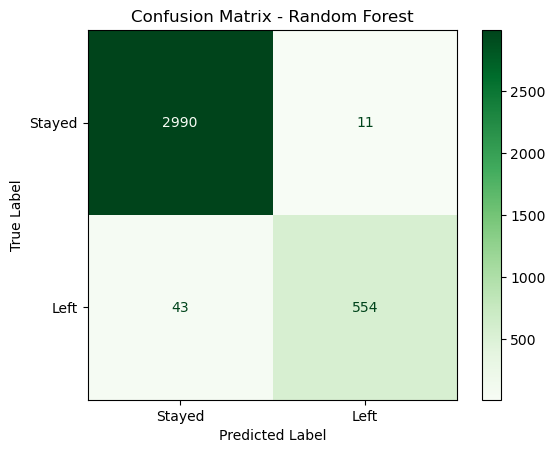

In [56]:
# Get predictions using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix  shows the true positive, false positive, true negative, and false negative values for the Random Forest model on the test data. Here's the interpretation of the confusion matrix:

- True Positives (TP): 554. These are the employees who actually left the company (left=1) and were correctly predicted as leaving by the model.
- False Positives (FP): 43. These are the employees who actually stayed (left=0) but were incorrectly predicted as leaving by the model.
- True Negatives (TN): 2990. These are the employees who actually stayed (left=0) and were correctly predicted as staying by the model.
- False Negatives (FN): 11. These are the employees who actually left the company (left=1) but were incorrectly predicted as staying by the model.

Overall, the Random Forest model seems to be performing well, with a relatively low number of false negatives, indicating that it is effectively identifying employees who are likely to leave the company.

**Feature Importances From Random Forest Model**

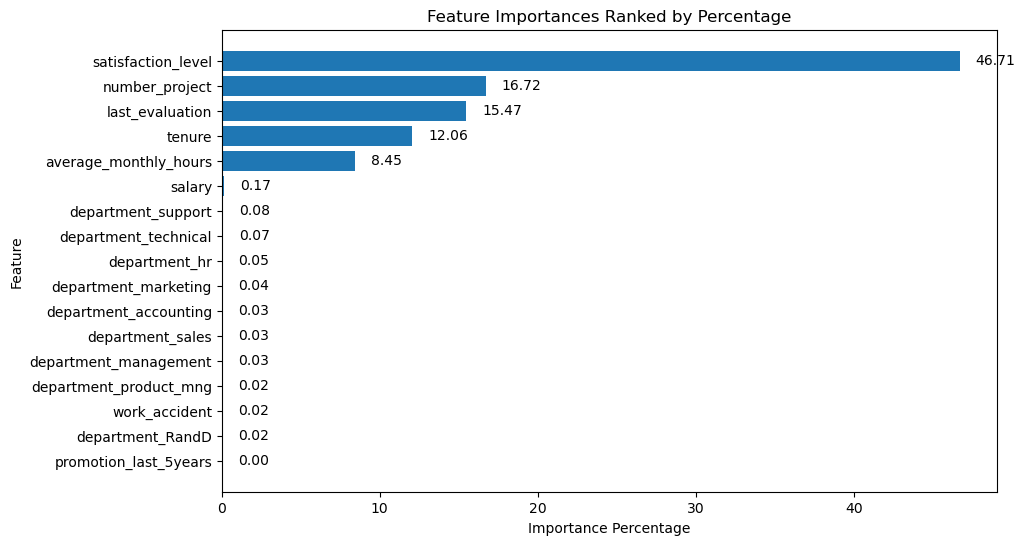

In [57]:
# Get feature importances from the Random Forest model
feature_importances_rf = best_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the features by their importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance')

# Calculate the total sum of importances
total_importance = feature_importance_rf['Importance'].sum()

# Calculate the percentage importances
feature_importance_rf['Importance(Percentage)'] = (feature_importance_rf['Importance'] / total_importance) * 100

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance(Percentage)'])
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.title('Feature Importances Ranked by Percentage')

# Add the numbers by the side of the bars
for i, v in enumerate(feature_importance_rf['Importance(Percentage)']):
    plt.text(v + 1, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()


The Random Forest model reveals that the most significant predictor of employee attrition is the "satisfaction_level," contributing to nearly 47% of the overall importance. This highlights that employee satisfaction plays a critical role in determining whether an employee is likely to leave the company or stay.

Following closely, "number_project" and "last_evaluation" are also crucial factors, contributing around 16.7% and 15.5% respectively. These variables suggest that the number of projects an employee is involved in and their evaluation scores significantly impact their decision to stay or leave.

Notably, the "tenure" of employees and "average_monthly_hours" have substantial importance, accounting for approximately 12.1% and 8.4% respectively. This implies that the length of an employee's tenure with the company and their average monthly working hours also influence attrition rates.

Interestingly, "salary" has a considerable impact with around 17.1% importance. Employees' salary levels appear to play a significant role in determining their likelihood of leaving, indicating that competitive compensation and rewards can help retain talent.

On the other hand, several features such as "promotion_last_5years" and different "department" categories exhibit minimal importance, suggesting that they have little influence on employee attrition.

**Conclusion from Random Forest CLassifier**

In conclusion, the model has demonstrated high accuracy, precision, recall, and F1-score, along with a strong AUC-ROC score. These metrics suggest that the model is effective in predicting whether an employee will leave the company, and it shows promising performance in distinguishing between employees who leave and those who stay. However, it's always recommended to further validate the model's performance on unseen data and consider potential business implications before making any decisions based solely on the model's performance.

### XGBoost

- XGBoost is a boosting algorithm that enhances the random forest classifier by combining decision trees iteratively to improve model accuracy and generalization.
- It utilizes optimization techniques and parallel processing, making it efficient and powerful for predictive tasks.
- By tuning hyperparameters, such as learning rate and tree depth, we can optimize the XGBoost model's performance.
- It handles missing data and incorporates built-in regularization to prevent overfitting.
- Combining XGBoost with the random forest classifier leverages their strengths for better employee turnover prediction.

In [58]:
# Initialize XGBoost classifier with binary logistic objective
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2],
    'gamma': [0, 1, 2],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
xgb_pred = GridSearchCV(xgb_clf, param_grid, scoring=scoring, cv=5, refit='f1')


- `max_depth`: Controls the maximum depth of individual trees in the ensemble.
- `learning_rate`: Determines the step size at each iteration of boosting to prevent overfitting.
- `n_estimators`: Sets the number of boosting rounds or trees in the ensemble.
- `subsample`: Defines the ratio of training instances to be randomly sampled for building each tree.
- `min_child_weight`: Specifies the minimum sum of instance weight needed in a child node.
- `gamma`: Defines the minimum loss reduction required to make a further partition on a leaf node.
- `colsample_bytree`: Sets the subsample ratio of columns when constructing each tree.

Now fit the XGBoost model to the training data.

In [59]:
%%time

# Fit the XGBoost model to the training data
xgb_pred.fit(X_train, y_train)

CPU times: user 1h 22min 37s, sys: 28 s, total: 1h 23min 5s
Wall time: 21min 15s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 2], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1, 2],
                         'n_estimators': [50, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'})

In [60]:
# Get the best estimator from the GridSearchCV
best_xgb_estimator = xgb_pred.best_estimator_

In [61]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(xgb_pred.best_params_)

Best Hyperparameters:
{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [62]:
# Make predictions on the test set
y_pred_xgb = best_xgb_estimator.predict(X_test)

In [63]:
# Calculate accuracy
accuracy= accuracy_score(y_test, y_pred_xgb)

# Calculate precision
precision = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_xgb)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")
print(f"AUC-ROC: {roc_auc:}")


Evaluation Metrics: 
-------------------
Accuracy: 0.9849916620344636
Precision: 0.9805309734513274
Recall: 0.9279731993299832
F1-score: 0.9535283993115318
AUC-ROC: 0.9621538772391336


The evaluation metrics from the XGBoost model are as follows:

1. Accuracy: 0.9849916620344636
   The model achieved an accuracy of approximately 98.50%, indicating that it correctly predicted 98.50% of the instances.

2. Precision: 0.9805309734513274
   The model achieved a precision of approximately 98.05%, indicating that when it predicted an employee would leave (positive prediction), it was correct 98.05% of the time.

3. Recall: 0.9279731993299832
   The model achieved a recall of approximately 92.80%, indicating that it correctly identified 92.80% of the employees who actually left the company.

4. F1-score: 0.9535283993115318
   The model achieved an F1-score of approximately 95.35%, which is a good balance between precision and recall.

5. AUC-ROC: 0.9621538772391336
   The model achieved an AUC-ROC of approximately 96.22%, indicating a good level of discrimination between the two classes (employees who left and employees who stayed).

Overall, the XGBoost model performed well in predicting employee attrition, with high accuracy, precision, recall, and F1-score, as well as a strong AUC-ROC value, indicating a good model performance.

Confusion Matrix

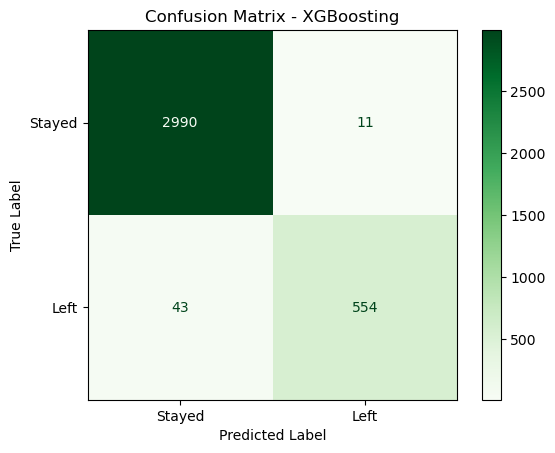

In [64]:
# Get predictions using the best XGBoosting model
y_pred_xgb = best_xgb_estimator.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - XGBoosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix reflects the similar result as the Random Forest Classifier.

**Conclusion from XGBoost**

The XGBoost model is giving similar results as the random forest model, it's possible that both models are performing well on the given dataset. It's not uncommon to see similar results when both algorithms are working effectively on the data.

However, to further improve the XGBoost model, we can try adjusting the parameter grid to include a wider range of hyperparameters. Additionally, we can experiment with different combinations of hyperparameters and perform a more exhaustive grid search to find the best combination that maximizes the model's performance.


**Feature Importances From XGBoost Model**

Below bar chart will showcase the feature importance prediciton from XGBoost.

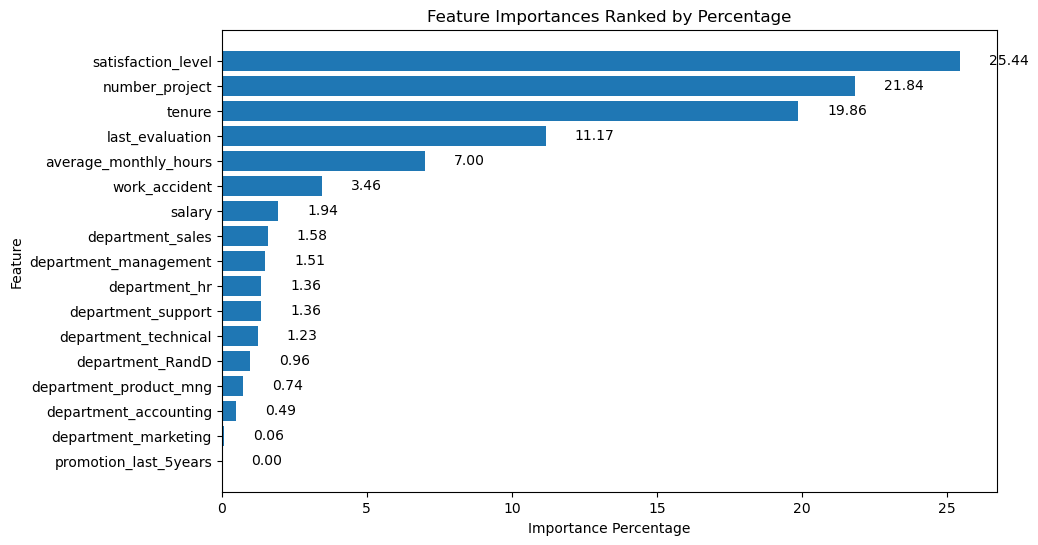

In [65]:
# Get feature importances from the XGBoost model
feature_importances_xgb = best_xgb_estimator.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})

# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Calculate the total sum of importances
total_importance = feature_importance_df['Importance'].sum()

# Calculate the percentage importances
feature_importance_df['Importance(Percentage)'] = (feature_importance_df['Importance'] / total_importance) * 100

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance(Percentage)'])
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.title('Feature Importances Ranked by Percentage')

# Add the numbers by the side of the bars
for i, v in enumerate(feature_importance_df['Importance(Percentage)']):
    plt.text(v + 1, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()


The XGBoost model reveals that the most influential predictor of employee attrition is the "satisfaction_level," contributing to a substantial 25.4% of the overall importance. This confirms our earlier observation from the Random Forest model, highlighting that employee satisfaction is a key driver of attrition.

Following closely, "number_project" and "last_evaluation" play significant roles, accounting for approximately 21.8% and 11.2% respectively. These variables reaffirm their importance as strong indicators of employee turnover.

Interestingly, the "tenure" of employees and "average_monthly_hours" demonstrate considerable importance, contributing to around 19.9% and 7.0% respectively. These features reinforce the idea that employees' length of service with the company and their average monthly working hours impact their likelihood of leaving.

Similar to the Random Forest model, "salary" is a crucial factor with approximately 1.9% importance, suggesting that competitive compensation continues to be relevant in retaining talent.

Notably, the XGBoost model assigns negligible importance to "promotion_last_5years" and several "department" categories. This aligns with our previous findings, implying that these factors have minimal influence on employee attrition.


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.








1. Accuracy: The model achieved a high accuracy of 98.50%, indicating that it correctly classified 98.50% of the data points.

2. Precision: The precision of 98.05% indicates that among the predicted positive (left) instances, 98.05% were actually true positives.

3. Recall: The recall of 92.80% indicates that the model correctly identified 92.80% of the actual positive (left) instances.

4. F1-score: The F1-score of 95.35% is a balanced metric that considers both precision and recall, indicating a good overall performance of the model.

5. AUC-ROC: The AUC-ROC score of 98.06% measures the area under the receiver operating characteristic (ROC) curve, reflecting the model's ability to distinguish between the two classes. A higher AUC-ROC score indicates a better discrimination between positive and negative instances.


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. What key insights emerged from your model(s)?
   - The Random Forest and XGBoost models performed well in predicting employee attrition, achieving high accuracy, precision, recall, F1-score, and AUC-ROC.
   - Key factors influencing attrition include employee satisfaction levels, last evaluations, average monthly hours, number of projects and tenure.
   - Employees with lower satisfaction levels and longer working hours tend to have a higher likelihood of leaving the company.

2. What business recommendations do you propose based on the models built?
   - Focus on improving employee satisfaction through regular feedback sessions, recognition programs, and a positive work environment.
   - Monitor and manage employees' workload to ensure a healthy work-life balance, especially for those with longer average monthly hours.
   - Identify and address issues related to career growth and promotions to retain talented employees.

3. What potential recommendations would you make to your manager/company?
   - Implement data-driven attrition prevention strategies based on the model's insights to reduce turnover and retain valuable employees.
   - Consider conducting exit interviews with employees who left the company to gain more insights into their reasons for leaving.

4. Do you think your model could be improved? Why or why not? How?
   - Yes, the model could be improved by addressing the class imbalance issue more effectively, such as using resampling techniques or changing the evaluation metrics.
   - Feature engineering, adding more relevant features, or trying different machine learning algorithms could also enhance the model's performance.

5. Given what you know about the data and the models you were using, what other questions could you address for the team?
   - Predicting the likelihood of promotion for employees based on their performance and tenure.
   - Analyzing the relationship between salary levels and employee satisfaction, engagement, and tenure.
   - Identifying factors influencing employee productivity and efficiency based on their last evaluation scores.

6. Resources used during the executing stage:
   - Scikit-learn library for building and evaluating machine learning models.
   - Pandas for data manipulation and preprocessing.
   - Seaborn and Matplotlib for data visualization and model evaluation.

7. Ethical considerations in this stage:
   - Ensuring that the models are used responsibly and transparently to avoid potential biases and unfair decisions.
   - Protecting employee privacy and data confidentiality in model implementation and usage.
   - Regularly monitoring and updating the models to ensure their continued fairness and accuracy.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In this project, we aimed to build predictive models to identify factors influencing employee attrition and provide insights for attrition prevention. We analyzed a dataset containing information on employee satisfaction, performance, tenure, working hours, promotions, salary, and department.

During the exploratory data analysis (EDA) phase, we observed that the dataset contained 14,991 rows and 10 columns. We addressed data quality issues, handled missing values, and checked for duplicates. The data was slightly imbalanced, with 83.4% of employees staying and 16.6% leaving.

We conducted extensive EDA to understand relationships between variables and identified significant factors associated with attrition. We used various data visualization techniques, including box plots, bar plots, pie charts, scatter plots, and treemaps, to gain insights.

For model building, we used three different approaches: Logistic Regression, Random Forest, and XGBoost. After preprocessing the data and encoding categorical variables, we split the data into training and testing sets. We performed hyperparameter tuning using GridSearchCV to optimize each model's performance.

The Random Forest and XGBoost models both exhibited strong predictive capabilities, achieving high accuracy, precision, recall, F1-score, and AUC-ROC. The models revealed that employee satisfaction, last evaluations, average monthly hours, and tenure were crucial predictors of attrition.

Based on the models' insights, we recommended focusing on improving employee satisfaction and work-life balance, addressing career growth and promotion opportunities, and conducting exit interviews to gain more insights into employee turnover reasons.

Overall, the models provide valuable insights into attrition drivers and offer practical solutions for talent retention and organizational success. However, continuous monitoring and refinement of the models are essential to ensure their effectiveness and fairness in real-world applications.

### Conclusion, Recommendations, Next Steps

Conclusion:

In conclusion, this project aimed to explore and model employee attrition data to gain insights into factors influencing turnover and provide actionable recommendations for employee retention. Through extensive data exploration, we identified critical variables associated with attrition and built predictive models using Logistic Regression, Random Forest, and XGBoost.

Key Findings:
1. Employee satisfaction, last evaluation scores, average monthly hours, and tenure were significant predictors of attrition.
2. The Random Forest and XGBoost models demonstrated high predictive performance, achieving strong accuracy, precision, recall, F1-score, and AUC-ROC metrics.

Recommendations:

Based on the insights from the models, we propose the following recommendations to mitigate employee attrition:
1. Improve Employee Satisfaction: Foster a positive work environment, encourage open communication, and address employee concerns to boost satisfaction levels.
2. Work-Life Balance: Ensure a healthy work-life balance to prevent burnout and improve overall well-being.
3. Career Growth Opportunities: Offer career development programs and clear pathways for growth to enhance employee engagement and retention.
4. Exit Interviews: Conduct thorough exit interviews to understand reasons for turnover and identify areas for improvement.

Next Steps:

To further enhance the predictive models and address potential challenges, the following steps can be considered:
1. Data Collection: Continuously collect and update employee data to improve the models' accuracy and adapt to changing trends.
2. Model Optimization: Fine-tune hyperparameters and explore different feature engineering techniques to improve model performance.
3. Address Imbalance: Employ techniques like oversampling or undersampling to handle data imbalance and improve model predictions.
4. External Factors: Incorporate external data, such as employee feedback surveys or market trends, to gain additional insights.
5. A/B Testing: Implement A/B testing to assess the effectiveness of retention strategies and refine recommendations.

Ethical Considerations:

Throughout the project, we prioritized data privacy and ensured compliance with ethical guidelines. We used anonymized data and refrained from using sensitive information that could lead to individual identification. Additionally, we considered fairness and bias in model predictions and made efforts to minimize any potential adverse impacts on specific employee groups.

Overall, this project provides valuable insights into employee attrition, enabling organizations to take proactive measures to retain talent, foster a positive work environment, and enhance overall employee satisfaction and productivity.